<a href="https://colab.research.google.com/github/kanakdas123/Computer-Vision-Advanced/blob/master/Copy_of_Stocks_Expiry_limits%2C_EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn
plt.style.use("seaborn")
import pandas_datareader.data as web
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

 # Mount in Google Drive

In [ ]:
 # You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
 
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
start = datetime(2020, 2, 1)
# end is current expiry date
end = datetime(2020, 8, 20)
# next_expiry is next to next expiry date
next_expiry = datetime(2020, 8, 27)
monthly_expiry = datetime(2020, 9, 3)
today = datetime.now()

In [ ]:
nxt_expiry = end.day - today.day
nxt_to_nxt_expiry = next_expiry.day - today.day
monthly_expiry = monthly_expiry.day - today.day

In [ ]:
stock = web.DataReader('^NSEBANK', 'yahoo', start, end)
stock.dropna(inplace=True)

In [ ]:
indiavix = web.DataReader('^INDIAVIX', 'yahoo', start, end)

In [ ]:
india_vix =indiavix.tail(1)['Close']

In [ ]:
stock.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-19,22419.349609,22234.25,22315.400391,22331.050781,0,22331.050781


In [ ]:
 indiavix

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-19,20.43,17.834999,20.43,19.9125,0,19.9125


In [ ]:
# nifty = pd.read_csv('Nifty_Master.csv')

In [ ]:
# nifty.index= nifty['Date']
#nifty.drop(['Date'], axis =1, inplace= True)

In [ ]:
 # To convert index to Date Time Frame 
stock.index = pd.to_datetime(stock.index)
#nifty.index = pd.to_datetime(nifty.index)

In [ ]:
stock['returns'] = stock['Close'].pct_change(1)
stock['Cumulative Return'] = (1 + stock['returns']).cumprod()

In [ ]:
 # Exponential Weighted Moving Average
stock['EWMA 21'] = stock['Close'].ewm(span=21).mean()
stock['EWMA 50'] = stock['Close'].ewm(span=50).mean()
stock['EWMA 200'] = stock['Close'].ewm(span=200).mean()

In [ ]:
stock.tail()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return,EWMA 21,EWMA 50,EWMA 200
Date,,,,,,,,,,,
2020-08-13,22439.949219,22139.599609,22395.199219,22196.349609,289100,22196.349609,-0.003039,0.739305,21925.059552,21643.556611,21862.991666
2020-08-14,22334.949219,21459.099609,22334.949219,21679.400391,318800,21679.400391,-0.023290,0.722087,21902.726824,21644.969439,21860.499021
2020-08-17,21909.400391,21403.150391,21906.949219,21700.849609,263400,21700.849609,0.000989,0.722801,21884.374293,21647.171586,21858.339271
2020-08-18,22227.750000,21629.400391,21702.000000,22170.599609,0,22170.599609,0.021647,0.738448,21910.394850,21667.795054,21862.548493
2020-08-19,22419.349609,22234.250000,22315.400391,22331.050781,0,22331.050781,0.007237,0.743792,21948.636397,21693.923007,21868.841621


In [ ]:
# Detection of range for monthly Options
# Upper Range = q3 + 1.5*std(30)
stock['q1'] = stock['Close'].quantile( q = 0.25)
stock['q3'] = stock['Close'].quantile( q =0.75)
stock['Upper Range'] = stock['q3'] +(stock['q3'] - stock['q1'])*1.5
# Lower Range = q1 - 2*std(30)
stock['Lower Range'] = stock['q1'] -(stock['q3'] - stock['q1'])*1.5
stock['Std'] = (stock['q3'] - stock['q1'])
stock['Price_Volume']=stock['Close']*stock['Volume']

In [ ]:
 # Detection of range for monthly Options
# Upper Range = q3 + 1.5*std(30)
# nifty['q1'] = nifty['P/E'].quantile( q = 0.25)
# nifty['q3'] = nifty['P/E'].quantile( q =0.75)
# nifty['Upper Range'] = nifty['q3'] +(nifty['q3'] - nifty['q1'])*1.5
# nifty['Std'] = (nifty['q3'] - nifty['q1'])
# Lower Range = q1 - 2*std(30)
#nifty['Lower Range'] = nifty['q1'] -(nifty['q3'] - nifty['q1'])*1.5

In [ ]:
 
# Boxplot
#stock[['Open', 'High', 'Close']].plot(kind='box',figsize=(8,11),fontsize = 12, colormap='jet')

In [ ]:
 # You can use a semi-colon to remove the axes print outs 
# scatter_matrix(stock,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [ ]:
# Stocks Upper Circuit & Lower Circuit limit
# nifty[['P/E','Upper Range', 'Lower Range', 'q1', 'q3']][start:].plot();

In [ ]:
#nifty.tail(5)

In [ ]:
# Yearly Low Range of stock
stock['Yearly Lower']=stock.tail(1)['Close']-stock.tail(1)['Close']*india_vix/100
# Yearly High Range of stock
stock['Yearly Upper'] =stock.tail(1)['Close']+stock.tail(1)['Close']*india_vix/100

In [ ]:
monthly_expiry

-16

In [ ]:
# Monthly Expiry Low Range of stock
stock['Monthly_expiry_Lower'] =stock.tail(1)['Close']-stock.tail(1)['Close']*india_vix/100/np.sqrt(365/monthly_expiry)
# Monthly High Range of stock
stock['Monthly_expiry_Upper'] =stock.tail(1)['Close']+stock.tail(1)['Close']*india_vix/100/np.sqrt(365/monthly_expiry)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [ ]:
nxt_to_nxt_expiry

8

In [ ]:
 # Next Weekly Low Range of stock
stock['Current_to_next_Weekly_Lower'] =stock.tail(1)['Close']-stock.tail(1)['Close']*india_vix/100/np.sqrt(365/nxt_to_nxt_expiry)
# Weekly High Range of stock
stock['Current_to_next_Weekly_Upper'] =stock.tail(1)['Close']+stock.tail(1)['Close']*india_vix/100/np.sqrt(365/nxt_to_nxt_expiry)

In [ ]:
 
 # Daily Low Range of stock
stock['Daily Lower'] =stock.tail(1)['Close']-stock.tail(1)['Close']*india_vix/100/np.sqrt(365)
# Daily High Range of stock
stock['Daily Upper'] =stock.tail(1)['Close']+stock.tail(1)['Close']*india_vix/100/np.sqrt(365)

In [ ]:
 nxt_expiry

1

In [ ]:
# Expiry Low Range of stock
stock['Current Expiry Lower'] =stock.tail(1)['Close']-stock.tail(1)['Close']*india_vix/100/np.sqrt(365/nxt_expiry)
# Expiry High Range of stock
stock['Current Expiry Upper'] =stock.tail(1)['Close']+stock.tail(1)['Close']*india_vix/100/np.sqrt(365/nxt_expiry)

In [ ]:
t = stock.drop(['Low','Open','Volume','Adj Close','returns','Cumulative Return','Std','Price_Volume','Lower Range','Yearly Lower', 'Yearly Upper','High'], axis=1)

# TRADING RANGE

In [ ]:
t.tail(1).T

Date,2020-08-19
Close,22331.050781
EWMA 21,21948.636397
EWMA 50,21693.923007
EWMA 200,21868.841621
q1,19722.799805
q3,22645.025391
Upper Range,27028.363770
Monthly_expiry_Lower,NaN
Monthly_expiry_Upper,NaN
Current_to_next_Weekly_Lower,21672.736135


# VISUALIZATION

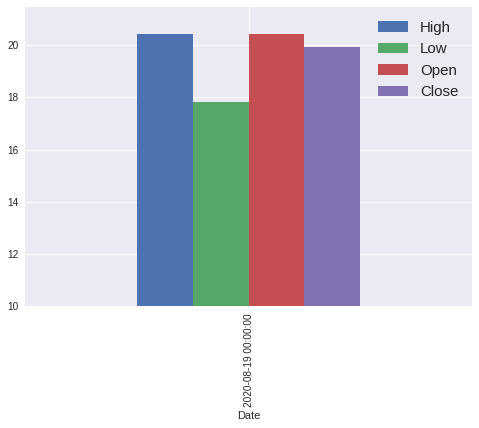

In [ ]:
 # Indiavix bar chart
indiavix[['High', 'Low', 'Open', 'Close']].plot(kind='bar', ylim = 10)
plt.legend(fontsize=15);

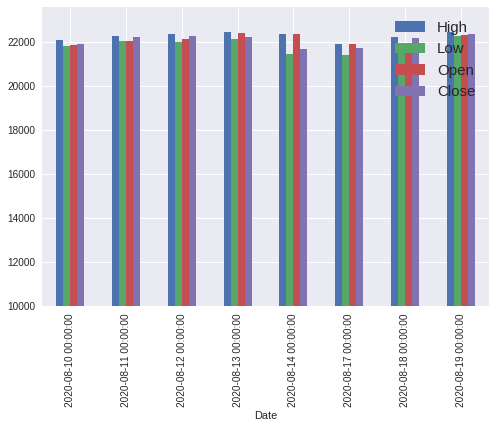

In [ ]:
# Stock price
stock[['High', 'Low', 'Open', 'Close']]['2020-08-08':].plot(kind='bar', ylim= 10000);
plt.legend(fontsize=15);

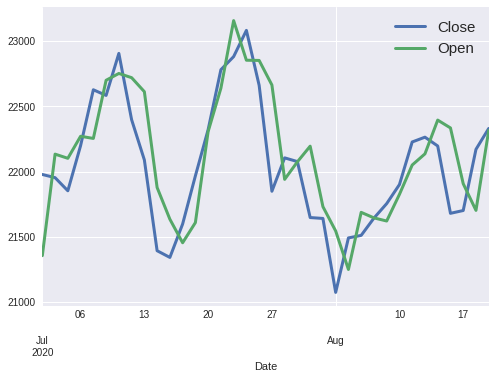

In [ ]:
 # Stock Open & Close Price
stock[['Close', 'Open']]['2020-07-01':].plot(lw=3);
plt.legend(fontsize =15);

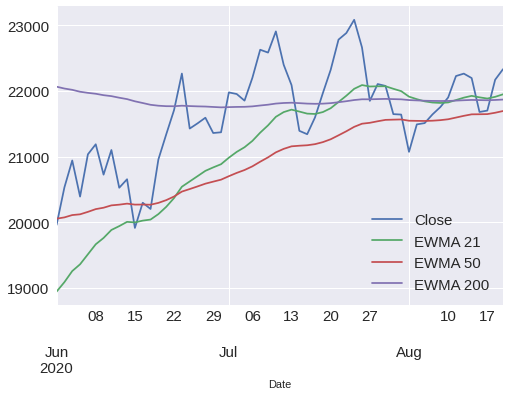

In [ ]:
 # Stocks EWMA trend
stock[['Close', 'EWMA 21', 'EWMA 50', 'EWMA 200']]['2020-06-01':].plot(fontsize = 15);
plt.legend(fontsize=15);

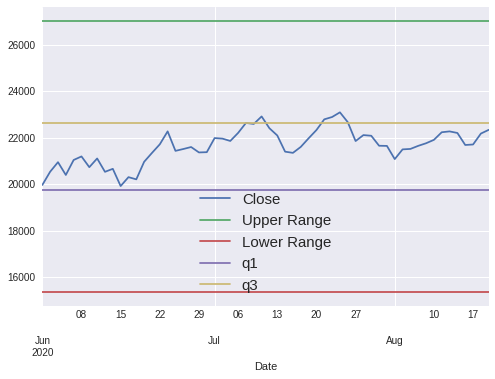

In [ ]:
# Stocks Upper Circuit & Lower Circuit limit
stock[['Close','Upper Range','Lower Range', 'q1', 'q3']]['2020-06-01':].plot();
plt.legend(fontsize=15);

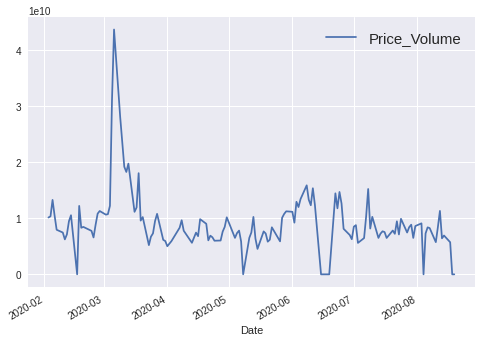

In [ ]:
#Stock Volume 
stock['Price_Volume']['2020-02-01':].plot()
plt.legend(fontsize=15);

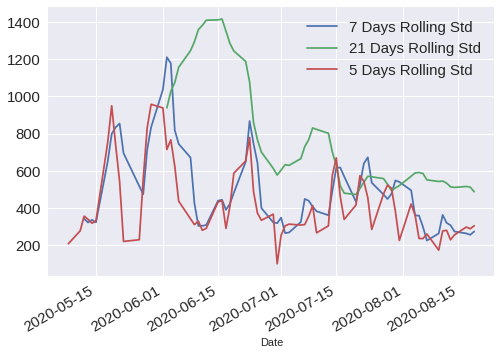

In [ ]:
 
# Standard deviation of stock
stock['Close']['2020-05-01':].rolling(7).std().plot(label='7 Days Rolling Std', fontsize= 15);
stock['Close']['2020-05-01':].rolling(21).std().plot(label='21 Days Rolling Std', fontsize= 15);
stock['Close']['2020-05-01':].rolling(5).std().plot(label='5 Days Rolling Std', fontsize= 15);
plt.legend(fontsize=15);

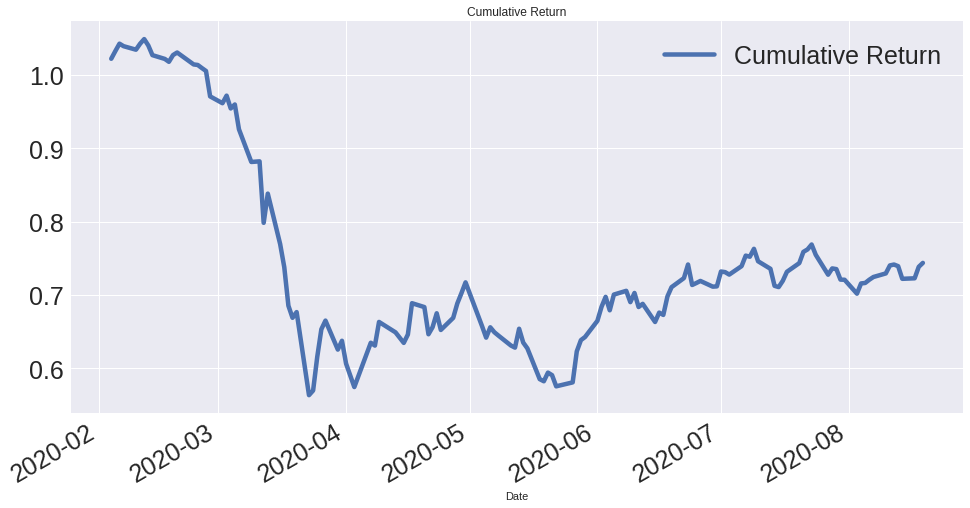

In [ ]:
 # Cumulative Return
stock['Cumulative Return'].plot(figsize=(16,8),title='Cumulative Return', lw=4.5,fontsize =25);
plt.legend(fontsize=25);

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
help(ARIMA)

NameError: ignored

In [ ]:
stock.index

In [ ]:
result=seasonal_decompose(stock['Close'], model = 'multiplicative')

In [ ]:
df = pd datfrme(stock)

# Install Libraries for Web Scraping
Steps o: Environments Set up

In [ ]:
pip install requests

In [ ]:
pip install html5lib

In [ ]:
pip install bs4

In [ ]:
# Import libraries 
import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://codewithharry.com"

 Step 1: Get the HTML & PARSE the HTML

In [ ]:
 
# Get the HTML content 
r = requests.get(url)
htmlcontent = r.content
print(htmlcontent)

In [ ]:
# Parse the HTML Content
soup = BeautifulSoup(htmlcontent, 'html.parser')
print(soup.prettify)

Step 2: HTML Tree Traversal

In [ ]:
# html tree traversal
title = soup.title
print(type(title))

In [ ]:
print(type(title.string))

In [ ]:
print(type(soup))

In [ ]:
# Types of objects: Tags, NavigableString, BeautifulSoup,Comment

In [ ]:
# Get the title of the HTML page
title = soup.title
# Get all the paragraphs from the page
paras = soup.find_all('p')
# print(paras)

In [ ]:
 
# Get first element in the html page
print(soup.find('p'))

In [ ]:
# Get classes of any element in the html page
print(soup.find('p')['class'])

In [ ]:
 
# find all the elements with class lead
print(soup.find_all("p", class_ = "lead"))

In [ ]:
# Get the text from the tags/soup
print(soup.find('p').get_text())

In [ ]:
 # To get all tags
# print(soup.get_text())

In [ ]:
# Get all the anchor tags from the page
anchors = soup.find_all('a')
all_links = set()

In [ ]:
# Get all the links on the page:
for link in anchors:
    if(link.get('href') !='#'):
      linkText = "https://codewithharry.com"+link.get('href')
      all_links.add(link)
      print(linkText)

In [ ]:
# How to see Comments
markup = "<p><!-- this is a comment --></p>"
soup2 = BeautifulSoup(markup)
print(soup2.p)

In [ ]:
print(type(soup2.p.string))